# Forest Coverage in India as of 2019





In [ ]:
!pip install openpyxl
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### *Importing our shape file and our data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Forest_Cover

/content/drive/MyDrive/Forest_Cover


In [ ]:
ls

 Changes2021.xlsx     Forest_2023.xlsx                       'India Boundary'/
 Changes2023.gsheet   forest-coverage-india-geopandas.ipynb  'India States'/
 Forest_2019.xlsx     Forest_Cover.pptx                      'Monthly Progress Report Format.docx'


In [ ]:
df = pd.read_excel('Forest_2019.xlsx')
shp_gdf = gpd.read_file('India States/Indian_states.shp')

In [ ]:
df.head(5)

,State/UTs,Geographical area,Very dense forest,Mod. dense forest,Open forest,Total forest,Percentage of geographical area,Scrub
0,Andhra Pradesh,"1,62,968","1,994","13,938","13,205","29,137",17.88,"8,255"
1,Arunachal Pradesh,"83,743","21,095","30,557","15,036","66,688",79.63,229
2,Assam,"78,438","2,795","10,279","15,253","28,327",36.11,173
3,Bihar,"94,163",333,"3,280","3,693","7,306",7.76,250
4,Chhattisgarh,"1,35,192","7,068","32,198","16,345","55,611",41.13,610


### *Renaming the states in our dataset to match the shape file*

In [ ]:
df1 = df[['State/UTs', 'Percentage of geographical area']]
df1['State/UTs'][30] = 'Andaman & Nicobar Island'
df1['State/UTs'][1] = 'Arunanchal Pradesh'
df1['State/UTs'][32] = 'Dadara & Nagar Havelli'
df1['State/UTs'][5] = 'NCT of Delhi'

<ipython-input-10-68dfe9cf1d6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UTs'][30] = 'Andaman & Nicobar Island'
<ipython-input-10-68dfe9cf1d6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UTs'][1] = 'Arunanchal Pradesh'
<ipython-input-10-68dfe9cf1d6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UTs'][32] = 'Dadara & Nagar Havelli'
<ipython-input-10-68dfe9cf1d6c>:5: SettingWithCopyWarni

In [ ]:
merged = shp_gdf.set_index('st_nm').join(df1.set_index('State/UTs'))
merged.head(40)

,geometry,Percentage of geographical area
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",81.74
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",79.63
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",36.11
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",7.76
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",19.32
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",41.13
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",42.16
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",18.46
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",60.43


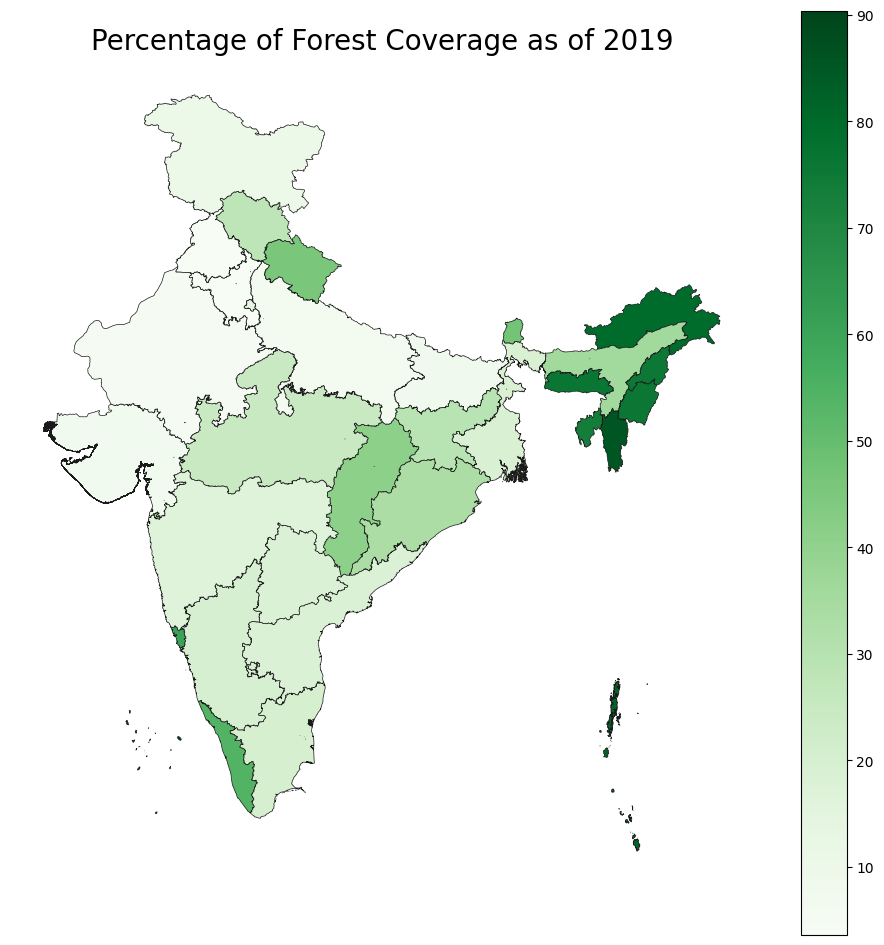

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Percentage of Forest Coverage as of 2019',
             fontdict={'fontsize': '20', 'fontweight' : '5'})
fig = merged.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.1',legend=True)

<Axes: xlabel='Percentage of geographical area', ylabel='State/UTs'>

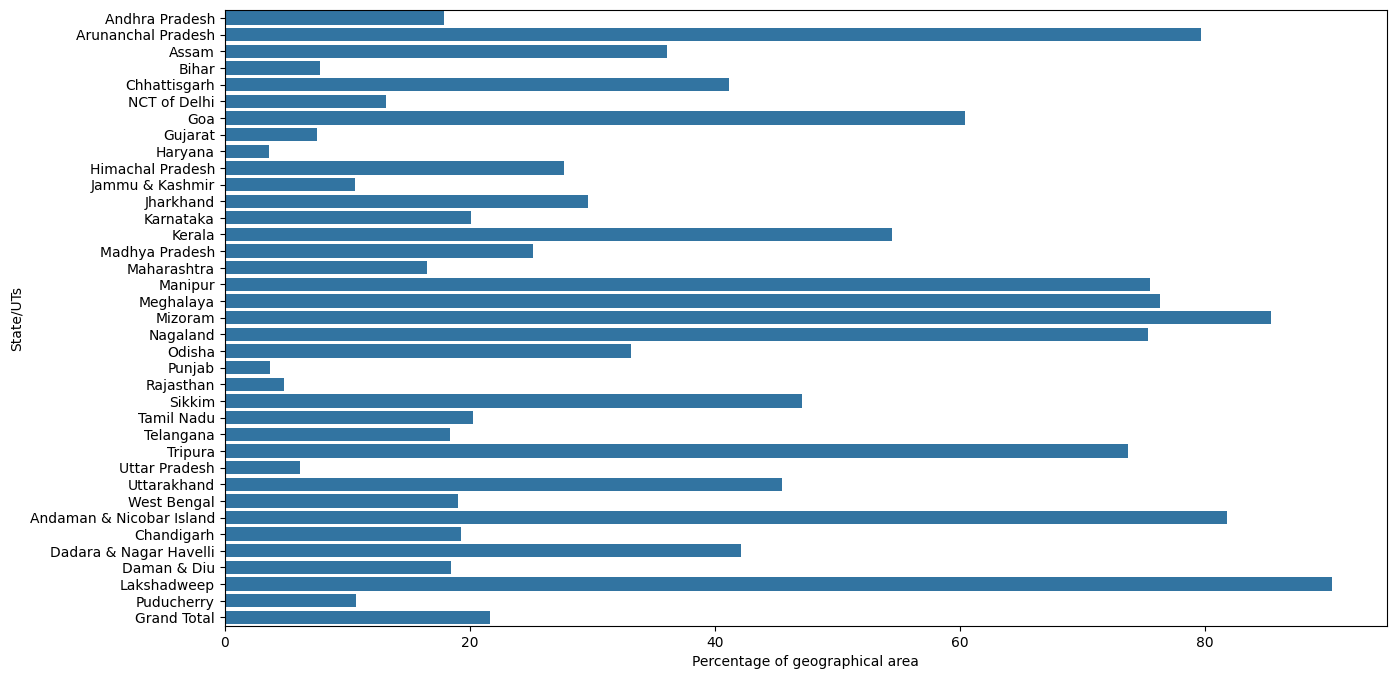

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="Percentage of geographical area", y = "State/UTs", data = df1)

# Forest Coverage in India as of 2023

---



In [ ]:
df = pd.read_excel('Forest_2023.xlsx')
shp_gdf = gpd.read_file('India States/Indian_states.shp')
df.head(5)

,State/UTs,Geographical area,Very dense forest,Mod. dense forest,Open forest,Total forest,Percentage of geographical area,Scrub
0,Andhra Pradesh,"1,62,968","1,994","13,938","13,205",29784,17.88,8276.0
1,Arunachal Pradesh,83743,"21,095","30,557","15,036",66431,79.63,797.0
2,Assam,78438,"2,795","10,279","15,253",28312,36.11,228.0
3,Bihar,94163,333,"3,280","3,693",7381,7.76,236.0
4,Chhattisgarh,"1,35,192","7,068","32,198","16,345",55717,41.13,615.0


### *Renaming the states in our dataset to match the shape file*

In [ ]:
df1 = df[['State/UTs', 'Percentage of geographical area']]
df1['State/UTs'][30] = 'Andaman & Nicobar Island'
df1['State/UTs'][1] = 'Arunanchal Pradesh'
df1['State/UTs'][32] = 'Dadara & Nagar Havelli'
df1['State/UTs'][5] = 'NCT of Delhi'

<ipython-input-15-68dfe9cf1d6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UTs'][30] = 'Andaman & Nicobar Island'
<ipython-input-15-68dfe9cf1d6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UTs'][1] = 'Arunanchal Pradesh'
<ipython-input-15-68dfe9cf1d6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['State/UTs'][32] = 'Dadara & Nagar Havelli'
<ipython-input-15-68dfe9cf1d6c>:5: SettingWithCopyWarni

In [ ]:
merged = shp_gdf.set_index('st_nm').join(df1.set_index('State/UTs'))
merged.head(40)

,geometry,Percentage of geographical area
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",19.04
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",79.63
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",36.11
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",7.76
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",81.74
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",41.13
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",42.16
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",18.46
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",60.43


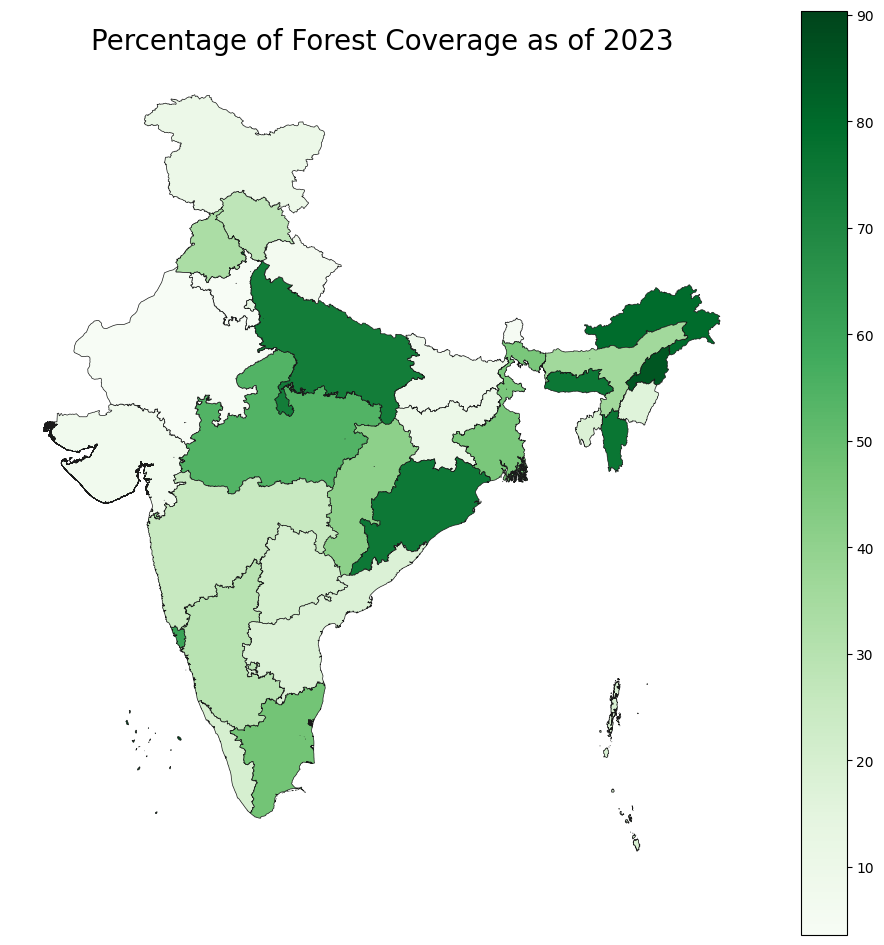

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Percentage of Forest Coverage as of 2023',
             fontdict={'fontsize': '20', 'fontweight' : '5'})
fig = merged.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.1',legend=True)

<Axes: xlabel='Percentage of geographical area', ylabel='State/UTs'>

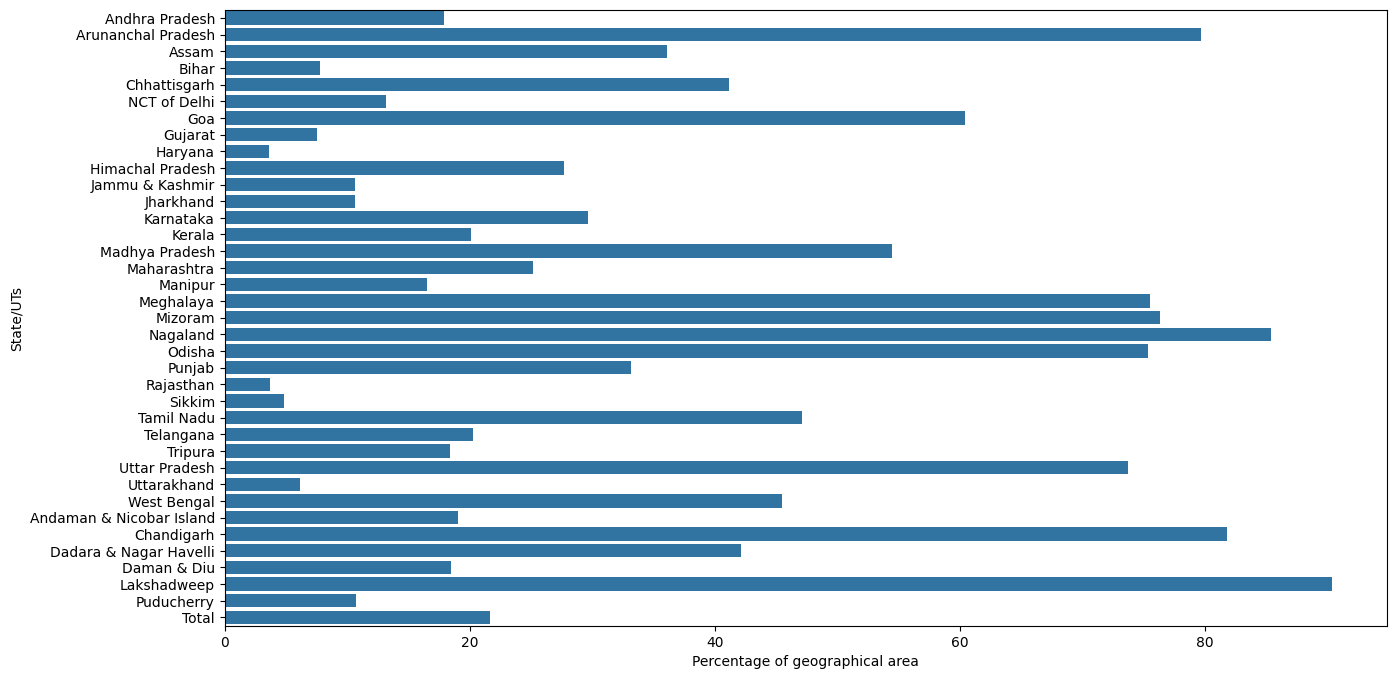

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="Percentage of geographical area", y = "State/UTs", data = df1)

# *Comparison of the forest coverage data for India from 2019 and 2023*

*Installing Packages and Libraries*

In [ ]:
# Install necessary packages
!pip install openpyxl
!pip install geopandas
!pip install plotly

# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

*Loading Both Data for 2019 and 2023*

In [ ]:
# Load forest coverage data for 2019
df_2019 = pd.read_excel('Forest_2019.xlsx')

# Load forest coverage data for 2023
df_2023 = pd.read_excel('Forest_2023.xlsx')

*Renaming of States*

In [ ]:
# Rename states to match shapefile
df_2019['State/UTs'].replace({
    'Andaman & Nicobar Island': 'Andaman and Nicobar Islands',
    'Arunanchal Pradesh': 'Arunachal Pradesh',
    'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli and Daman and Diu',
    'NCT of Delhi': 'Delhi'
}, inplace=True)

df_2023['State/UTs'].replace({
    'Andaman & Nicobar Island': 'Andaman and Nicobar Islands',
    'Arunanchal Pradesh': 'Arunachal Pradesh',
    'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli and Daman and Diu',
    'NCT of Delhi': 'Delhi'
}, inplace=True)

*Merging of Data with Shapefile and Plotting Forest Coverage*

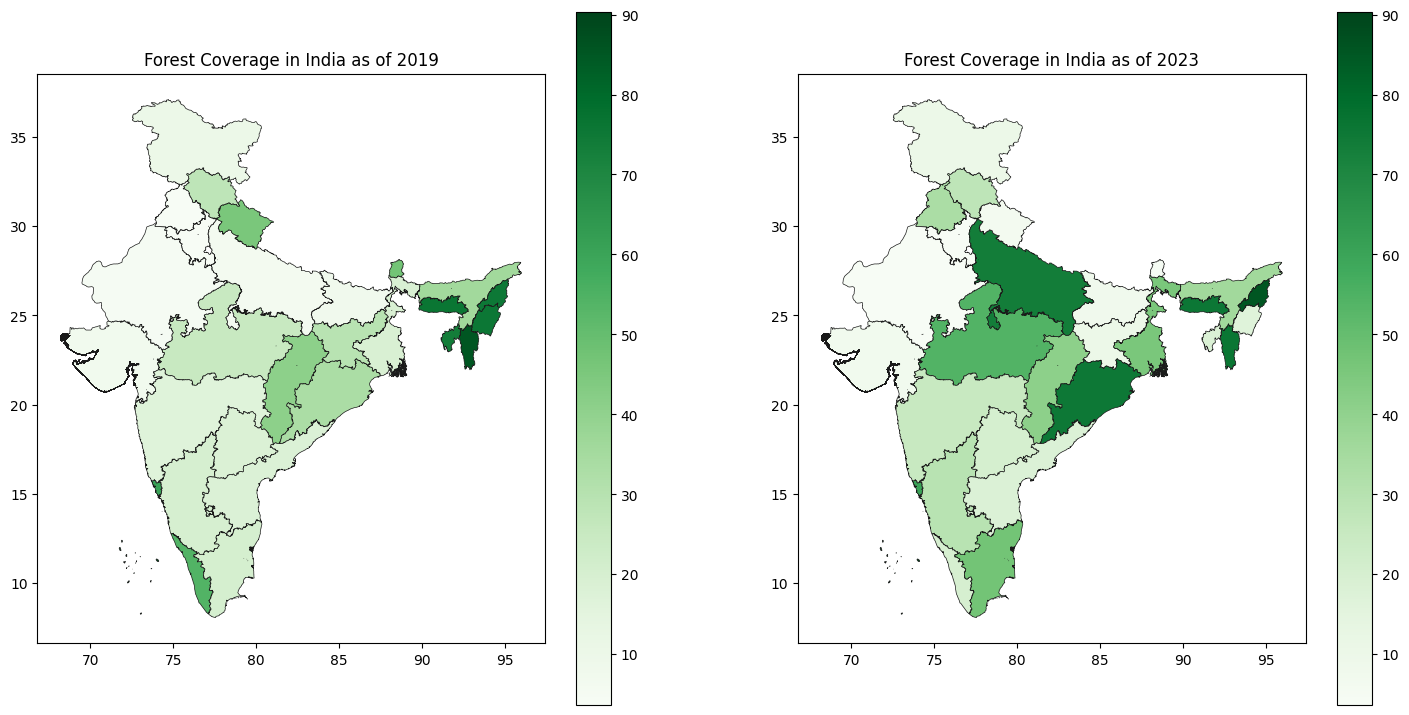

In [ ]:
# Merge data with shapefile
shp_gdf = gpd.read_file('India States/Indian_states.shp')

merged_2019 = shp_gdf.set_index('st_nm').join(df_2019.set_index('State/UTs'))
merged_2023 = shp_gdf.set_index('st_nm').join(df_2023.set_index('State/UTs'))

# Plot forest coverage maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.set_title('Forest Coverage in India as of 2019')
merged_2019.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax1, edgecolor='0.1', legend=True)

ax2.set_title('Forest Coverage in India as of 2023')
merged_2023.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax2, edgecolor='0.1', legend=True)

plt.show()

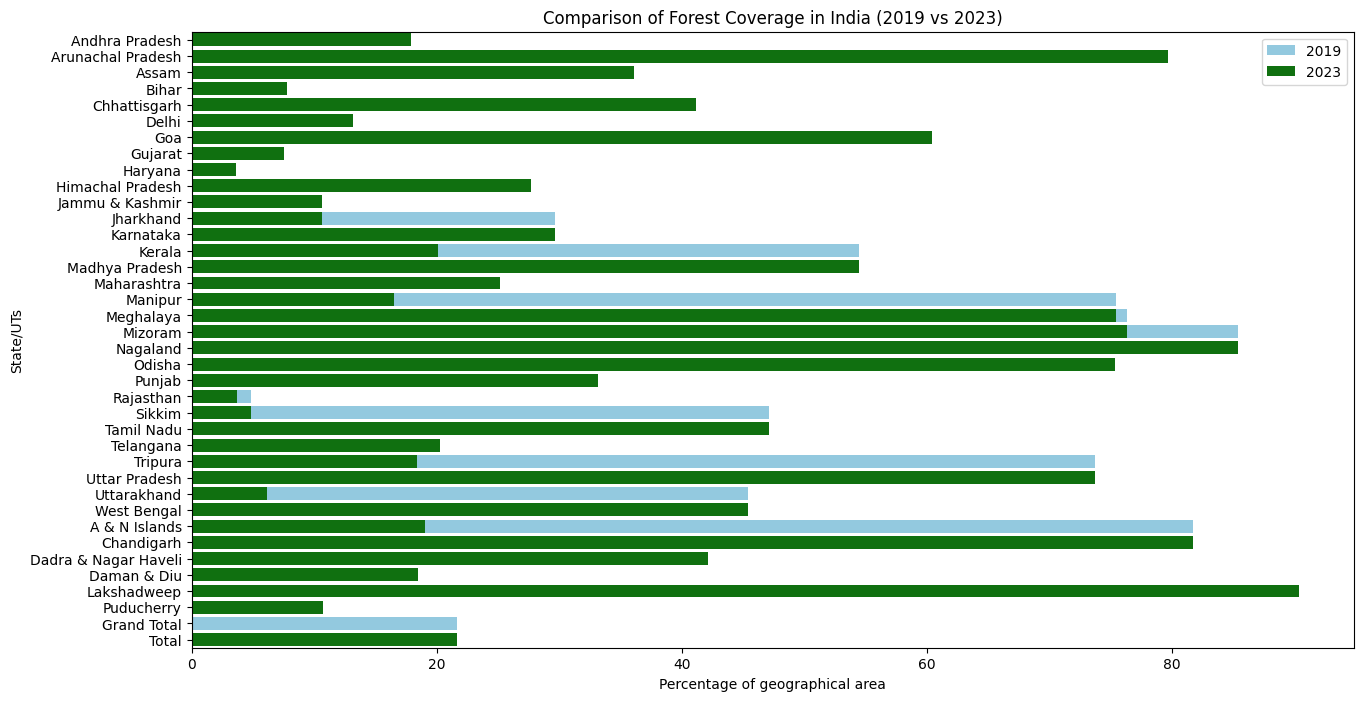

In [ ]:
# Compare numerical data
plt.figure(figsize=(15, 8))
sns.barplot(x="Percentage of geographical area", y="State/UTs", data=df_2019, color='skyblue', label='2019')
sns.barplot(x="Percentage of geographical area", y="State/UTs", data=df_2023, color='green', label='2023')
plt.title('Comparison of Forest Coverage in India (2019 vs 2023)')
plt.xlabel('Percentage of geographical area')
plt.ylabel('State/UTs')
plt.legend()
plt.show()


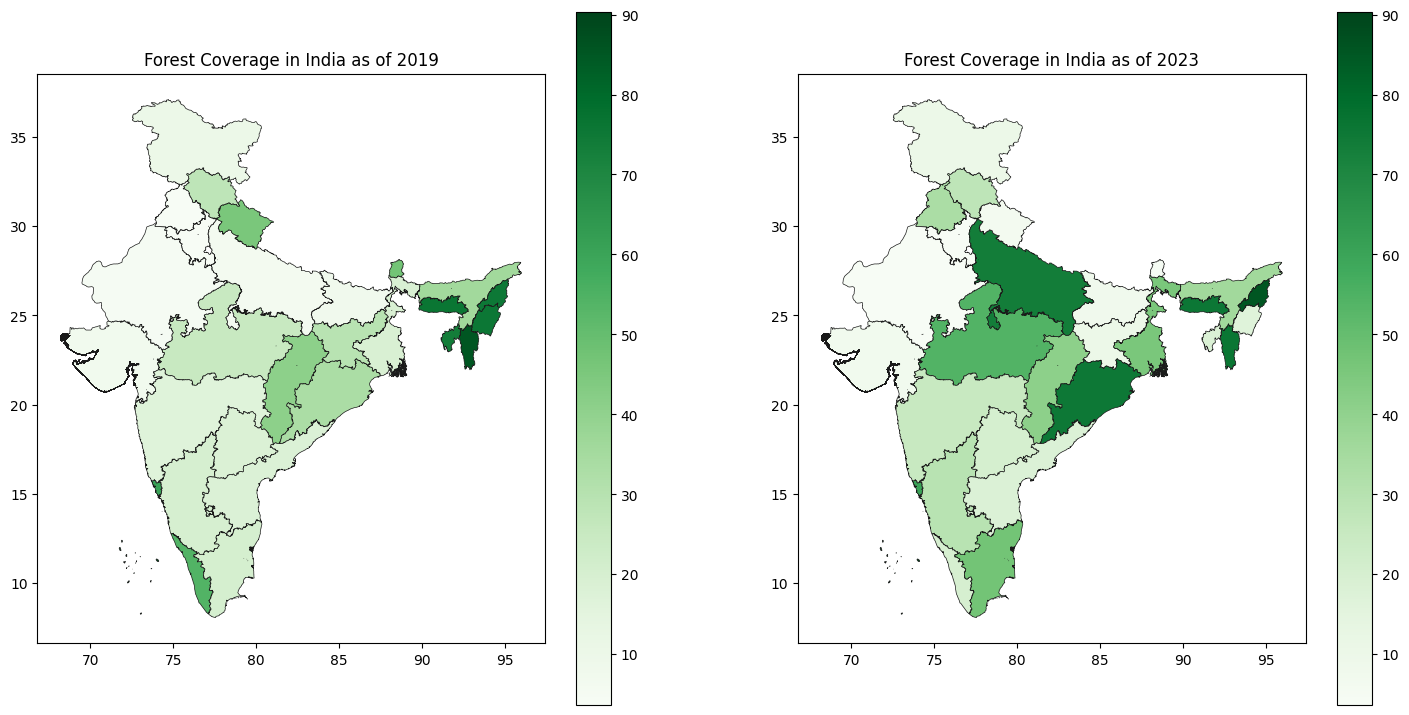

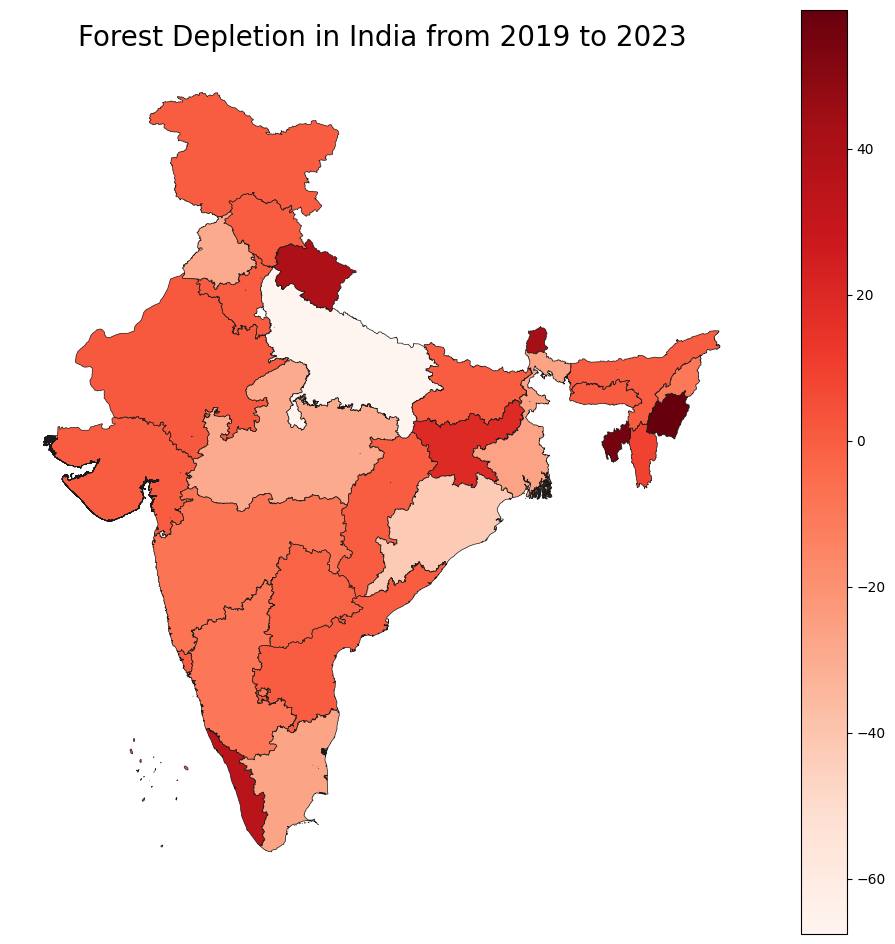

In [ ]:
# Load forest coverage data for 2019
df_2019 = pd.read_excel('/content/drive/MyDrive/Forest_Cover/Forest_2019.xlsx')
# Load forest coverage data for 2023
df_2023 = pd.read_excel('/content/drive/MyDrive/Forest_Cover/Forest_2023.xlsx')

# Rename states to match shapefile
df_2019['State/UTs'].replace({
    'Andaman & Nicobar Island': 'Andaman and Nicobar Islands',
    'Arunanchal Pradesh': 'Arunachal Pradesh',
    'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli and Daman and Diu',
    'NCT of Delhi': 'Delhi'
}, inplace=True)
df_2023['State/UTs'].replace({
    'Andaman & Nicobar Island': 'Andaman and Nicobar Islands',
    'Arunanchal Pradesh': 'Arunachal Pradesh',
    'Dadara & Nagar Havelli': 'Dadra and Nagar Haveli and Daman and Diu',
    'NCT of Delhi': 'Delhi'
}, inplace=True)

# Merge data with shapefile
shp_gdf = gpd.read_file('/content/drive/MyDrive/Forest_Cover/India States/Indian_states.shp')
merged_2019 = shp_gdf.set_index('st_nm').join(df_2019.set_index('State/UTs'))
merged_2023 = shp_gdf.set_index('st_nm').join(df_2023.set_index('State/UTs'))

# Plot forest coverage maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
ax1.set_title('Forest Coverage in India as of 2019')
merged_2019.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax1, edgecolor='0.1', legend=True)
ax2.set_title('Forest Coverage in India as of 2023')
merged_2023.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax2, edgecolor='0.1', legend=True)
plt.show()

# Calculate the percentage of forest cover depletion for each region
merged_2019['Forest_Coverage_2023'] = merged_2023['Percentage of geographical area']
merged_2019['Forest_Depletion_Percentage'] = merged_2019['Percentage of geographical area'] - merged_2019['Forest_Coverage_2023']

# Plot forest depletion map
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Forest Depletion in India from 2019 to 2023', fontdict={'fontsize': '20', 'fontweight' : '5'})
fig = merged_2019.plot(column='Forest_Depletion_Percentage', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)
plt.show()


<ipython-input-53-2c4ba49d9c33>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




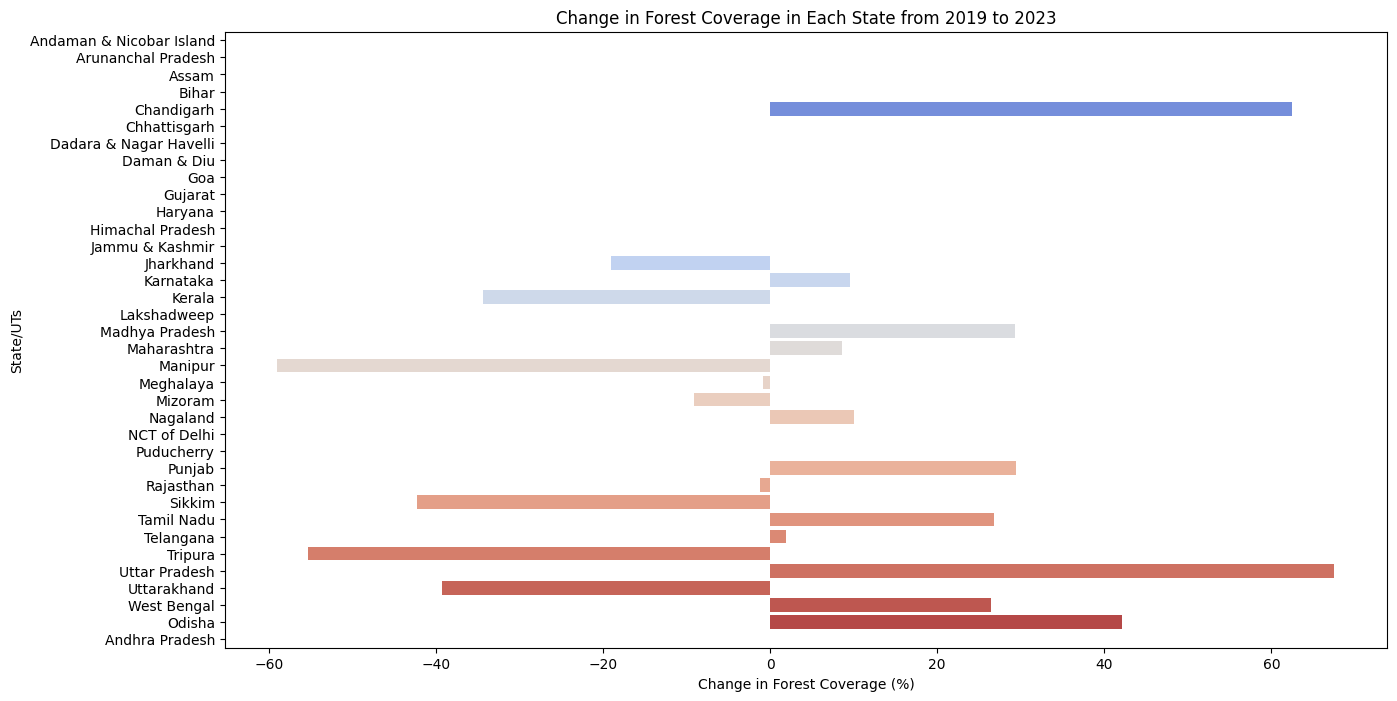

In [ ]:
# Calculate the difference in forest coverage between 2019 and 2023
df_diff = merged_2023.copy()
df_diff['Forest_Coverage_2019'] = merged_2019['Percentage of geographical area']
df_diff['Difference'] = df_diff['Percentage of geographical area'] - df_diff['Forest_Coverage_2019']

# Plot bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x="Difference", y=df_diff.index, data=df_diff, palette="coolwarm")
plt.title('Change in Forest Coverage in Each State from 2019 to 2023')
plt.xlabel('Change in Forest Coverage (%)')
plt.ylabel('State/UTs')
plt.show()


In [ ]:
# Total forest cover change by region
# Assuming regions are predefined or can be derived from the data
# For simplicity, let's consider four regions: North, South, East, West
# You may need to adjust this based on your specific data
north_states = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Uttar Pradesh', 'Chandigarh']
south_states = ['Andhra Pradesh', 'Telangana', 'Karnataka', 'Tamil Nadu', 'Kerala', 'Puducherry', 'Lakshadweep', 'Andaman and Nicobar Islands']
east_states = ['Bihar', 'Odisha', 'West Bengal', 'Jharkhand', 'Chhattisgarh']
west_states = ['Rajasthan', 'Gujarat', 'Goa', 'Maharashtra']

# Initialize total cover change for each region
total_cover_change_north = 0
total_cover_change_south = 0
total_cover_change_east = 0
total_cover_change_west = 0

# Calculate total cover change for each region
for state in north_states:
    if state in df_diff.index:
        total_cover_change_north += df_diff.loc[state, 'Difference']

for state in south_states:
    if state in df_diff.index:
        total_cover_change_south += df_diff.loc[state, 'Difference']

for state in east_states:
    if state in df_diff.index:
        total_cover_change_east += df_diff.loc[state, 'Difference']

for state in west_states:
    if state in df_diff.index:
        total_cover_change_west += df_diff.loc[state, 'Difference']

# Print calculated values
print("Total Forest Cover Change across all states:", total_cover_change)
print("Average Forest Cover Change across all states:", average_cover_change)
print("Maximum Forest Cover Change among all states:", max_cover_change)
print("Minimum Forest Cover Change among all states:", min_cover_change)
print("Standard Deviation of Forest Cover Change among all states:", std_cover_change)
print("Total Forest Cover Change in North region:", total_cover_change_north)
print("Total Forest Cover Change in South region:", total_cover_change_south)
print("Total Forest Cover Change in East region:", total_cover_change_east)
print("Total Forest Cover Change in West region:", total_cover_change_west)


Total Forest Cover Change across all states: 54.0
Average Forest Cover Change across all states: 1.6875
Maximum Forest Cover Change among all states: 67.53
Minimum Forest Cover Change among all states: -58.959999999999994
Standard Deviation of Forest Cover Change among all states: 28.423153101970662
Total Forest Cover Change in North region: 120.13999999999999
Total Forest Cover Change in South region: 3.9399999999999977
Total Forest Cover Change in East region: 49.56
Total Forest Cover Change in West region: 7.45


**Statistical Testing:** We'll perform statistical tests to determine significant differences in forest coverage between 2019 and 2023 for each state/UT. We can use hypothesis testing methods such as t-tests or ANOVA. First, we need to prepare the data by calculating the difference in forest coverage between the two years for each state/UT.

In [ ]:
# Calculate the difference in forest coverage between 2019 and 2023
merged_2019['Forest_Coverage_2023'] = merged_2023['Percentage of geographical area']
merged_2019['Forest_Depletion_Percentage'] = merged_2019['Percentage of geographical area'] - merged_2019['Forest_Coverage_2023']
# Print some values from the DataFrame
print(merged_2019.head())

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   

                         Geographical area Very dense forest  \
st_nm                                                          
Andaman & Nicobar Island               NaN               NaN   
Arunanchal Pradesh                     NaN               NaN   
Assam                               78,438             2,795   
Bihar                               94,163               333   
Chandigarh                             114              1.36  